In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
per_diet_recom_path = "../datasets/Personalized Medical Diet Recommendations Dataset/Personalized_Diet_Recommendations.csv"

In [3]:
original_df = pd.read_csv(per_diet_recom_path)
original_df

Patient_ID  Age  Gender  Height_cm  Weight_kg    BMI Chronic_Disease  \
0        P00001   56   Other        163         66  24.84             NaN   
1        P00002   69  Female        171        114  38.99             NaN   
2        P00003   46  Female        172        119  40.22             NaN   
3        P00004   32  Female        197        118  30.41             NaN   
4        P00005   60  Female        156        109  44.79    Hypertension   
...         ...  ...     ...        ...        ...    ...             ...   
4995     P04996   42  Female        172         99  33.46             NaN   
4996     P04997   39  Female        155         61  25.39             NaN   
4997     P04998   48  Female        165         61  22.41        Diabetes   
4998     P04999   34   Other        151         82  35.96   Heart Disease   
4999     P05000   72   Other        173         98  32.74             NaN   

      Blood_Pressure_Systolic  Blood_Pressure_Diastolic  Cholesterol_Level  \
0                         175                        75                219   
1                         155                        72                208   
2                         137                       101                171   
3                         148                        91                258   
4                         160                       109                260   
...                       ...                       ...                ...   
4995                      115                        78                279   
4996                      110                        97                258   
4997                      113                        82                183   
4998                      105                        75                248   
4999                      121                       105                292   

      ...  Protein_Intake Carbohydrate_Intake Fat_Intake  Preferred_Cuisine  \
0     ...             105                 179        143            Western   
1     ...              69                 315         75      Mediterranean   
2     ...             183                 103        148            Western   
3     ...             135                 371        120            Western   
4     ...             167                 298         48             Indian   
...   ...             ...                 ...        ...                ...   
4995  ...              59                 356         64            Western   
4996  ...             119                 164        112             Indian   
4997  ...              50                 351         41      Mediterranean   
4998  ...              50                 397        131              Asian   
4999  ...             184                 234         67             Indian   

      Food_Aversions  Recommended_Calories Recommended_Protein  \
0                NaN                  2150                 108   
1                NaN                  1527                  74   
2              Sweet                  2359                 180   
3                NaN                  2858                 137   
4              Spicy                  1937                 166   
...              ...                   ...                 ...   
4995           Spicy                  2869                  70   
4996             NaN                  1138                 131   
4997           Spicy                  2893                  40   
4998           Salty                  2201                  56   
4999             NaN                  2869                 200   

     Recommended_Carbs Recommended_Fats  Recommended_Meal_Plan  
0                  139              145      High-Protein Diet  
1                  266               80          Balanced Diet  
2                  145              143      High-Protein Diet  
3                  378              135      High-Protein Diet  
4                  317               56      High-Protein Diet  
...        

### Features taken from Module A - Data Visulaization
### Also taking out the target

In [4]:
features=['Age','Gender','Height_cm','Weight_kg','BMI','Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Level','Blood_Sugar_Level', 'Daily_Steps','Sleep_Hours','Alcohol_Consumption','Smoking_Habit','Dietary_Habits']
target_name = "Recommended_Meal_Plan"
len(features)

14

### Creating new dataframe from the given features only

In [5]:
df = original_df[features]
df

Age  Gender  Height_cm  Weight_kg    BMI  Blood_Pressure_Systolic  \
0      56   Other        163         66  24.84                      175   
1      69  Female        171        114  38.99                      155   
2      46  Female        172        119  40.22                      137   
3      32  Female        197        118  30.41                      148   
4      60  Female        156        109  44.79                      160   
...   ...     ...        ...        ...    ...                      ...   
4995   42  Female        172         99  33.46                      115   
4996   39  Female        155         61  25.39                      110   
4997   48  Female        165         61  22.41                      113   
4998   34   Other        151         82  35.96                      105   
4999   72   Other        173         98  32.74                      121   

      Blood_Pressure_Diastolic  Cholesterol_Level  Blood_Sugar_Level  \
0                           75                219                124   
1                           72                208                 72   
2                          101                171                145   
3                           91                258                235   
4                          109                260                248   
...                        ...                ...                ...   
4995                        78                279                112   
4996                        97                258                 93   
4997                        82                183                151   
4998                        75                248                153   
4999                       105                292                129   

      Daily_Steps  Sleep_Hours Alcohol_Consumption Smoking_Habit  \
0           11452          7.6                  No           Yes   
1           12962          6.3                 Yes            No   
2            7898          9.9                  No            No   
3            6602          4.2                  No            No   
4            9810          9.0                  No            No   
...           ...          ...                 ...           ...   
4995         5723          6.5                  No            No   
4996         4786          7.2                 Yes            No   
4997         5390          8.8                  No            No   
4998        12887          7.0                  No           Yes   
4999         8945          8.7                 Yes           Yes   

     Dietary_Habits  
0        Vegetarian  
1        Vegetarian  
2        Vegetarian  
3        Vegetarian  
4           Regular  
...             ...  
4995     Vegetarian  
4996           Keto  
4997        Regular  
4998           Keto  
4999          Vegan  

[5000 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   int64  
 1   Gender                    5000 non-null   object 
 2   Height_cm                 5000 non-null   int64  
 3   Weight_kg                 5000 non-null   int64  
 4   BMI                       5000 non-null   float64
 5   Blood_Pressure_Systolic   5000 non-null   int64  
 6   Blood_Pressure_Diastolic  5000 non-null   int64  
 7   Cholesterol_Level         5000 non-null   int64  
 8   Blood_Sugar_Level         5000 non-null   int64  
 9   Daily_Steps               5000 non-null   int64  
 10  Sleep_Hours               5000 non-null   float64
 11  Alcohol_Consumption       5000 non-null   object 
 12  Smoking_Habit             5000 non-null   object 
 13  Dietary_Habits            5000 non-null   object 
dtypes: float

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(col)

Gender
Alcohol_Consumption
Smoking_Habit
Dietary_Habits


In [8]:
class RawtoTrain:
    def __init__(self, blood_pressure_mapping, cholestrol_mapping, blood_sugar_mapping):
        self.blood_pressure_mapping = blood_pressure_mapping
        self.cholestrol_mapping = cholestrol_mapping
        self.blood_sugar_mapping = blood_sugar_mapping

    
    def bmi_converter(self, height_cm: int, weight_kg: int):
        return (weight_kg * 10000) / height_cm ** 2

    
    def blood_pressure_converter(self, systolic: int, diastolic: int):
        if systolic < 90 or diastolic < 60:
            value = "Low"
        elif 90 <= systolic <= 129 and 60 <= diastolic <= 79:
            value = "Normal"
        elif systolic > 129 or diastolic > 79:
            value =  "High"
        else:
            value = "Normal"
        
        return value
        
   
    def cholesterol_converter(self, cholesterol_level: int):
        if cholesterol_level < 200:
            value = "Optimal"
        elif 200 <= cholesterol_level < 240:
            value = "Borderline"
        else:
            value = "High"
        
        #return self.cholestrol_mapping[value]
        return value

    
    def blood_sugar_converter(self, blood_sugar_level: int):
        if blood_sugar_level < 70:
            value = "Low"
        elif 70 <= blood_sugar_level <= 99:
            value = "Normal"
        else:  #blood_sugar_level >= 100
            value = "High"
        
        #return self.blood_pressure_mapping[value]
        return value
    
    def __drop_converted_features(self, df):
        columns_to_be_dropped = ["Blood_Pressure_Systolic", "Blood_Pressure_Diastolic","Cholesterol_Level", "Blood_Sugar_Level"]
        df = df.drop(columns= columns_to_be_dropped)
        return df

    def raw_to_train_feature_conv(self, df):
        '''
        Takes in the original dataframe and returns the transformed df that is ready to train.
        Convert df into user required data format
        i.e numerical data into categorical
        '''
        
        df["blood_pressure_converted"] = df.apply(lambda row: self.blood_pressure_converter(row["Blood_Pressure_Systolic"], row["Blood_Pressure_Diastolic"]), axis = 1)
        df["cholesterol_level_converted"] = df.apply(lambda row: self.cholesterol_converter(row["Cholesterol_Level"]), axis = 1)
        df["blood_sugar_level_converted"] = df.apply(lambda row: self.blood_sugar_converter(row["Blood_Sugar_Level"]), axis= 1)

        df = self.__drop_converted_features(df)
        
        return df
        
                                              

In [9]:
class RawtoTrainLabel:
    def __init__(self, single_column):
        self.label_to_index = {}
        self.index_to_label = {}
        self.single_column = single_column
        self.__create_mapping()
    
    def __create_mapping(self):
        unique_values = sorted(set(self.single_column))
        self.label_to_index = {unique_value : idx +1 for idx, unique_value in enumerate(unique_values)}
        self.index_to_label = {idx+ 1 : unique_value for idx, unique_value in enumerate(unique_values)}
    
    def convert_label_to_index(self, column):
        return [self.label_to_index[value] for value in column]

    def convert_index_to_label(self, column):
        return [self.index_to_label[value] for value in column]
    

class RawtoTrainLabelOneHot:
    def __init__(self, df, column_name, unique_values):
        self.df = df
        self.column_name = column_name
        self.unique_values = unique_values

    def convert_label_to_onehot(self):
        df = self.df
        new_columns = [self.column_name + "_" + unique_value for unique_value in self.unique_values]
        print(f"new columns list : {new_columns}")
        new_df = pd.DataFrame(0, index = np.arange(df.shape[0]), columns=new_columns)

        for idx, row in enumerate(df[self.column_name]):
            new_df_col_name = self.column_name + "_" + row
            new_df.loc[idx, new_df_col_name] = 1
        
        df.drop(columns=[self.column_name], inplace= True)
        
        # print("newdf ", new_df)
        # print("df", df)
        df = pd.concat([df, new_df], axis= 1)
        return df

In [10]:
blood_pressure_mapping = {
    "Low" : 1,
    "Normal" : 2,
    "High" : 2
}
cholestrol_mapping = {
    "Optimal" : 1,
    "Borderline" : 2,
    "High" : 3
}

blood_sugar_mapping = {
    "Low" : 1,
    "Normal": 2,
    "High": 3
}

### Converted thesse values to categorigal
- BMI calculation from height and weight
- blood pressure range (High, Normal, Low)
- cholesterol_level
- blood_sugar_level

In [11]:
raw_to_train = RawtoTrain(blood_pressure_mapping, cholestrol_mapping, blood_sugar_mapping)
df = raw_to_train.raw_to_train_feature_conv(df)
df

/tmp/ipykernel_171826/4219025302.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["blood_pressure_converted"] = df.apply(lambda row: self.blood_pressure_converter(row["Blood_Pressure_Systolic"], row["Blood_Pressure_Diastolic"]), axis = 1)
/tmp/ipykernel_171826/4219025302.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cholesterol_level_converted"] = df.apply(lambda row: self.cholesterol_converter(row["Cholesterol_Level"]), axis = 1)
/tmp/ipykernel_171826/4219025302.py:62: SettingWithCopyWarn

Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Sleep_Hours  \
0      56   Other        163         66  24.84        11452          7.6   
1      69  Female        171        114  38.99        12962          6.3   
2      46  Female        172        119  40.22         7898          9.9   
3      32  Female        197        118  30.41         6602          4.2   
4      60  Female        156        109  44.79         9810          9.0   
...   ...     ...        ...        ...    ...          ...          ...   
4995   42  Female        172         99  33.46         5723          6.5   
4996   39  Female        155         61  25.39         4786          7.2   
4997   48  Female        165         61  22.41         5390          8.8   
4998   34   Other        151         82  35.96        12887          7.0   
4999   72   Other        173         98  32.74         8945          8.7   

     Alcohol_Consumption Smoking_Habit Dietary_Habits  \
0                     No           Yes     Vegetarian   
1                    Yes            No     Vegetarian   
2                     No            No     Vegetarian   
3                     No            No     Vegetarian   
4                     No            No        Regular   
...                  ...           ...            ...   
4995                  No            No     Vegetarian   
4996                 Yes            No           Keto   
4997                  No            No        Regular   
4998                  No           Yes           Keto   
4999                 Yes           Yes          Vegan   

     blood_pressure_converted cholesterol_level_converted  \
0                        High                  Borderline   
1                        High                  Borderline   
2                        High                     Optimal   
3                        High                        High   
4                        High                        High   
...                       ...                         ...   
4995                   Normal                        High   
4996                     High                        High   
4997                     High                     Optimal   
4998                   Normal                        High   
4999                     High                        High   

     blood_sugar_level_converted  
0                           High  
1                         Normal  
2                           High  
3                           High  
4                           High  
...                          ...  
4995                        High  
4996                      Normal  
4997                        High  
4998                        High  
4999                        High  

[5000 rows x 13 columns]

In [12]:
processed_df = df.copy()
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          5000 non-null   int64  
 1   Gender                       5000 non-null   object 
 2   Height_cm                    5000 non-null   int64  
 3   Weight_kg                    5000 non-null   int64  
 4   BMI                          5000 non-null   float64
 5   Daily_Steps                  5000 non-null   int64  
 6   Sleep_Hours                  5000 non-null   float64
 7   Alcohol_Consumption          5000 non-null   object 
 8   Smoking_Habit                5000 non-null   object 
 9   Dietary_Habits               5000 non-null   object 
 10  blood_pressure_converted     5000 non-null   object 
 11  cholesterol_level_converted  5000 non-null   object 
 12  blood_sugar_level_converted  5000 non-null   object 
dtypes: float64(2), int

### The above values are what user enters

In [13]:
df.drop(columns= ["Height_cm", "Weight_kg"], inplace= True)

### Label Conversion to indexes

In [14]:
# Before Conversion:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          5000 non-null   int64  
 1   Gender                       5000 non-null   object 
 2   BMI                          5000 non-null   float64
 3   Daily_Steps                  5000 non-null   int64  
 4   Sleep_Hours                  5000 non-null   float64
 5   Alcohol_Consumption          5000 non-null   object 
 6   Smoking_Habit                5000 non-null   object 
 7   Dietary_Habits               5000 non-null   object 
 8   blood_pressure_converted     5000 non-null   object 
 9   cholesterol_level_converted  5000 non-null   object 
 10  blood_sugar_level_converted  5000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 429.8+ KB


In [15]:
df

Age  Gender    BMI  Daily_Steps  Sleep_Hours Alcohol_Consumption  \
0      56   Other  24.84        11452          7.6                  No   
1      69  Female  38.99        12962          6.3                 Yes   
2      46  Female  40.22         7898          9.9                  No   
3      32  Female  30.41         6602          4.2                  No   
4      60  Female  44.79         9810          9.0                  No   
...   ...     ...    ...          ...          ...                 ...   
4995   42  Female  33.46         5723          6.5                  No   
4996   39  Female  25.39         4786          7.2                 Yes   
4997   48  Female  22.41         5390          8.8                  No   
4998   34   Other  35.96        12887          7.0                  No   
4999   72   Other  32.74         8945          8.7                 Yes   

     Smoking_Habit Dietary_Habits blood_pressure_converted  \
0              Yes     Vegetarian                     High   
1               No     Vegetarian                     High   
2               No     Vegetarian                     High   
3               No     Vegetarian                     High   
4               No        Regular                     High   
...            ...            ...                      ...   
4995            No     Vegetarian                   Normal   
4996            No           Keto                     High   
4997            No        Regular                     High   
4998           Yes           Keto                   Normal   
4999           Yes          Vegan                     High   

     cholesterol_level_converted blood_sugar_level_converted  
0                     Borderline                        High  
1                     Borderline                      Normal  
2                        Optimal                        High  
3                           High                        High  
4                           High                        High  
...                          ...                         ...  
4995                        High                        High  
4996                        High                      Normal  
4997                     Optimal                        High  
4998                        High                        High  
4999                        High                        High  

[5000 rows x 11 columns]

In [16]:
for col in df.select_dtypes(include=['object']).columns:
    print(col , " => ", df[col].unique())

Gender  =>  ['Other' 'Female' 'Male']
Alcohol_Consumption  =>  ['No' 'Yes']
Smoking_Habit  =>  ['Yes' 'No']
Dietary_Habits  =>  ['Vegetarian' 'Regular' 'Keto' 'Vegan']
blood_pressure_converted  =>  ['High' 'Normal']
cholesterol_level_converted  =>  ['Borderline' 'Optimal' 'High']
blood_sugar_level_converted  =>  ['High' 'Normal']


In [17]:
## Custom dummies function:

column_name_unique_val_map = {
    "Gender" : ["Male", "Female", "Other"],
    "Alcohol_Consumption" : ["Yes", "No"],
    "Smoking_Habit" : ["Yes", "No"],
    "Dietary_Habits" : ["Regular", "Vegetarian", "Keto", "Vegan"],
    "blood_pressure_converted" : ["Low", "Normal", "High"],
    "cholesterol_level_converted" : ["Borderline", "Optimal", "High"],
    "blood_sugar_level_converted" : ["Low", "Normal", "High"]
}

for col_name, unique_val in column_name_unique_val_map.items():
    one_hot_encode = RawtoTrainLabelOneHot(df, column_name= col_name, unique_values= unique_val)
    df = one_hot_encode.convert_label_to_onehot()

df

new columns list : ['Gender_Male', 'Gender_Female', 'Gender_Other']
new columns list : ['Alcohol_Consumption_Yes', 'Alcohol_Consumption_No']
new columns list : ['Smoking_Habit_Yes', 'Smoking_Habit_No']
new columns list : ['Dietary_Habits_Regular', 'Dietary_Habits_Vegetarian', 'Dietary_Habits_Keto', 'Dietary_Habits_Vegan']
new columns list : ['blood_pressure_converted_Low', 'blood_pressure_converted_Normal', 'blood_pressure_converted_High']
new columns list : ['cholesterol_level_converted_Borderline', 'cholesterol_level_converted_Optimal', 'cholesterol_level_converted_High']
new columns list : ['blood_sugar_level_converted_Low', 'blood_sugar_level_converted_Normal', 'blood_sugar_level_converted_High']


Age    BMI  Daily_Steps  Sleep_Hours  Gender_Male  Gender_Female  \
0      56  24.84        11452          7.6            0              0   
1      69  38.99        12962          6.3            0              1   
2      46  40.22         7898          9.9            0              1   
3      32  30.41         6602          4.2            0              1   
4      60  44.79         9810          9.0            0              1   
...   ...    ...          ...          ...          ...            ...   
4995   42  33.46         5723          6.5            0              1   
4996   39  25.39         4786          7.2            0              1   
4997   48  22.41         5390          8.8            0              1   
4998   34  35.96        12887          7.0            0              0   
4999   72  32.74         8945          8.7            0              0   

      Gender_Other  Alcohol_Consumption_Yes  Alcohol_Consumption_No  \
0                1                        0                       1   
1                0                        1                       0   
2                0                        0                       1   
3                0                        0                       1   
4                0                        0                       1   
...            ...                      ...                     ...   
4995             0                        0                       1   
4996             0                        1                       0   
4997             0                        0                       1   
4998             1                        0                       1   
4999             1                        1                       0   

      Smoking_Habit_Yes  ...  Dietary_Habits_Vegan  \
0                     1  ...                     0   
1                     0  ...                     0   
2                     0  ...                     0   
3                     0  ...                     0   
4                     0  ...                     0   
...                 ...  ...                   ...   
4995                  0  ...                     0   
4996                  0  ...                     0   
4997                  0  ...                     0   
4998                  1  ...                     0   
4999                  1  ...                     1   

      blood_pressure_converted_Low  blood_pressure_converted_Normal  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   
...                            ...                              ...   
4995                             0                                1   
4996                             0                                0   
4997                             0                                0   
4998                             0                                1   
4999                             0                                0   

      blood_pressure_converted_High  cholesterol_level_converted_Borderline  \
0                                 1                                       1   
1                                 1                                       1   
2                                 1                                       0   
3                                 1                                       0   
4                                 1                                       0   
...                             ...                                     ...   
4995                              0                                       0   
4996                              1                                       0   
4997                              1                

In [18]:
# for col in df.select_dtypes(include=['object']).columns:
#     label_converter = RawtoTrainLabel(df[col])
#     df[col] = label_converter.convert_label_to_index(df[col])

# for col in df.select_dtypes(include=['object']).columns:
#     df[col] = pd.get_dummies(df[col], dtype= int)

# df

In [19]:
#After Conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     5000 non-null   int64  
 1   BMI                                     5000 non-null   float64
 2   Daily_Steps                             5000 non-null   int64  
 3   Sleep_Hours                             5000 non-null   float64
 4   Gender_Male                             5000 non-null   int64  
 5   Gender_Female                           5000 non-null   int64  
 6   Gender_Other                            5000 non-null   int64  
 7   Alcohol_Consumption_Yes                 5000 non-null   int64  
 8   Alcohol_Consumption_No                  5000 non-null   int64  
 9   Smoking_Habit_Yes                       5000 non-null   int64  
 10  Smoking_Habit_No                        5000 non-null   int6

In [20]:
df

Age    BMI  Daily_Steps  Sleep_Hours  Gender_Male  Gender_Female  \
0      56  24.84        11452          7.6            0              0   
1      69  38.99        12962          6.3            0              1   
2      46  40.22         7898          9.9            0              1   
3      32  30.41         6602          4.2            0              1   
4      60  44.79         9810          9.0            0              1   
...   ...    ...          ...          ...          ...            ...   
4995   42  33.46         5723          6.5            0              1   
4996   39  25.39         4786          7.2            0              1   
4997   48  22.41         5390          8.8            0              1   
4998   34  35.96        12887          7.0            0              0   
4999   72  32.74         8945          8.7            0              0   

      Gender_Other  Alcohol_Consumption_Yes  Alcohol_Consumption_No  \
0                1                        0                       1   
1                0                        1                       0   
2                0                        0                       1   
3                0                        0                       1   
4                0                        0                       1   
...            ...                      ...                     ...   
4995             0                        0                       1   
4996             0                        1                       0   
4997             0                        0                       1   
4998             1                        0                       1   
4999             1                        1                       0   

      Smoking_Habit_Yes  ...  Dietary_Habits_Vegan  \
0                     1  ...                     0   
1                     0  ...                     0   
2                     0  ...                     0   
3                     0  ...                     0   
4                     0  ...                     0   
...                 ...  ...                   ...   
4995                  0  ...                     0   
4996                  0  ...                     0   
4997                  0  ...                     0   
4998                  1  ...                     0   
4999                  1  ...                     1   

      blood_pressure_converted_Low  blood_pressure_converted_Normal  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   
...                            ...                              ...   
4995                             0                                1   
4996                             0                                0   
4997                             0                                0   
4998                             0                                1   
4999                             0                                0   

      blood_pressure_converted_High  cholesterol_level_converted_Borderline  \
0                                 1                                       1   
1                                 1                                       1   
2                                 1                                       0   
3                                 1                                       0   
4                                 1                                       0   
...                             ...                                     ...   
4995                              0                                       0   
4996                              1                                       0   
4997                              1                

In [21]:
final_feature_names = df.columns
final_feature_names

Index(['Age', 'BMI', 'Daily_Steps', 'Sleep_Hours', 'Gender_Male',
       'Gender_Female', 'Gender_Other', 'Alcohol_Consumption_Yes',
       'Alcohol_Consumption_No', 'Smoking_Habit_Yes', 'Smoking_Habit_No',
       'Dietary_Habits_Regular', 'Dietary_Habits_Vegetarian',
       'Dietary_Habits_Keto', 'Dietary_Habits_Vegan',
       'blood_pressure_converted_Low', 'blood_pressure_converted_Normal',
       'blood_pressure_converted_High',
       'cholesterol_level_converted_Borderline',
       'cholesterol_level_converted_Optimal',
       'cholesterol_level_converted_High', 'blood_sugar_level_converted_Low',
       'blood_sugar_level_converted_Normal',
       'blood_sugar_level_converted_High'],
      dtype='object')

In [22]:
target_df = original_df[target_name]
target_df

0       High-Protein Diet
1           Balanced Diet
2       High-Protein Diet
3       High-Protein Diet
4       High-Protein Diet
              ...        
4995        Low-Carb Diet
4996        Low-Carb Diet
4997        Low-Carb Diet
4998         Low-Fat Diet
4999        Low-Carb Diet
Name: Recommended_Meal_Plan, Length: 5000, dtype: object

In [23]:
## Converting target column to index:
target_label_converter = RawtoTrainLabel(target_df)
target_col = target_label_converter.convert_label_to_index(target_df)
target_col[:20]

[2, 1, 2, 2, 2, 4, 3, 1, 4, 3, 2, 1, 3, 4, 1, 4, 2, 1, 4, 2]

In [24]:
target_label_converter.convert_index_to_label([2])

['High-Protein Diet']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target_col, test_size=0.2, random_state=42)
X_train

Age    BMI  Daily_Steps  Sleep_Hours  Gender_Male  Gender_Female  \
4227   55  15.24         7116          8.3            1              0   
4676   47  36.45         3391          8.8            0              1   
800    29  16.41         7392          7.4            1              0   
3671   49  23.70         5174          4.1            0              1   
4193   39  28.63         3697          8.7            0              0   
...   ...    ...          ...          ...          ...            ...   
4426   44  17.86         2037          7.2            0              0   
466    23  21.84         9941          7.8            0              1   
3092   21  25.76        10608          8.9            0              1   
3772   55  30.06         3323          5.5            0              1   
860    21  27.44         3706          6.8            1              0   

      Gender_Other  Alcohol_Consumption_Yes  Alcohol_Consumption_No  \
4227             0                        1                       0   
4676             0                        0                       1   
800              0                        0                       1   
3671             0                        0                       1   
4193             1                        0                       1   
...            ...                      ...                     ...   
4426             1                        0                       1   
466              0                        1                       0   
3092             0                        1                       0   
3772             0                        0                       1   
860              0                        1                       0   

      Smoking_Habit_Yes  ...  Dietary_Habits_Vegan  \
4227                  0  ...                     0   
4676                  1  ...                     0   
800                   0  ...                     0   
3671                  0  ...                     1   
4193                  0  ...                     0   
...                 ...  ...                   ...   
4426                  0  ...                     0   
466                   0  ...                     0   
3092                  0  ...                     0   
3772                  0  ...                     0   
860                   0  ...                     0   

      blood_pressure_converted_Low  blood_pressure_converted_Normal  \
4227                             0                                0   
4676                             0                                0   
800                              0                                0   
3671                             0                                0   
4193                             0                                0   
...                            ...                              ...   
4426                             0                                1   
466                              0                                0   
3092                             0                                0   
3772                             0                                0   
860                              0                                0   

      blood_pressure_converted_High  cholesterol_level_converted_Borderline  \
4227                              1                                       1   
4676                              1                                       0   
800                               1                                       1   
3671                              1                                       0   
4193                              1                                       0   
...                             ...                                     ...   
4426                              0                                       1   
466                               1                                       0   
3092                              1                

## Creating model

In [26]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [27]:
dt_model = DecisionTreeClassifier(max_depth= 50, random_state= 42)
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [28]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score
# Predictions
y_pred = dt_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.25


In [30]:
# Plot the Decision Tree
plt.figure(figsize=(50,30), dpi= 300)
plot_tree(dt_model, feature_names=final_feature_names, class_names=[str(cls) for cls in dt_model.classes_], filled=True, rounded=True, fontsize=10)
plt.show()


Text(0.5, 0, 'Feature Importance')

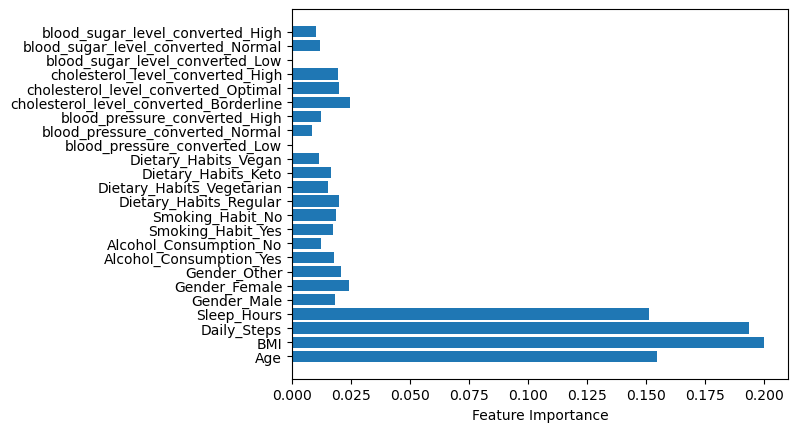

In [31]:
plt.barh(final_feature_names, dt_model.feature_importances_)
plt.xlabel("Feature Importance")

In [32]:
processed_df.columns  #this df is for final plot

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Sleep_Hours', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'blood_pressure_converted', 'cholesterol_level_converted',
       'blood_sugar_level_converted'],
      dtype='object')

In [32]:
from joblib import dump, load
dump(dt_model, '../models/dt_model.joblib')

['../models/dt_model.joblib']

In [33]:
# Load the model
clf = load('../models/dt_model.joblib')

In [45]:
## Saving objects for inference process
import pickle

inference_dict = {
    "raw_to_train" : raw_to_train,
    "target_label_converter": target_label_converter,
    "processed_df" : processed_df
}

with open("../models/inference_dict.pickle", "wb") as file:
    pickle.dump(inference_dict, file)
print("inference_dict saved to output")

inference_dict saved to output


In [ ]:
import joblib

# saving the decision tree model
joblib.dump(dt_model, "/kaggle/working/dt_model.joblib")

In [ ]:
import random

class Patient:
    
    def __init__(self, name: str, 
                age: int, 
                gender: str, 
                height_cm: float, 
                weight_kg: float, 
                blood_pressure: str, 
                cholesterol_level:str, 
                blood_sugar_level: str, 
                daily_steps: int = 8400,
                sleep_hours : int = 7, 
                alcohol_consumption : bool = False, 
                smoking_habit : bool = False,
                dietary_habit: str = "Regular"
                ):
        self.name = name
        self.age = age
        self.gender = gender
        self.height_cm = height_cm
        self.weight_kg = weight_kg
        self.blood_pressure = blood_pressure
        self.cholesterol_level = cholesterol_level
        self.blood_sugar_level = blood_sugar_level
        self.daily_steps = daily_steps
        self.sleep_hours = sleep_hours
        self.alcohol_consumption = alcohol_consumption
        self.smoking_habit = smoking_habit
        self.dietary_habit = dietary_habit
        self.user_input_dict = self.__user_to_train_feature_conv()


    def __user_to_train_feature_conv(self):
        user_input_dict = {
            "Age" : self.age,
            "BMI" : raw_to_train.bmi_converter(self.height_cm, self.weight_kg),
            "Daily_Steps" : self.daily_steps,
            "Sleep_Hours" : self.sleep_hours,
            
            "Gender_Male" : 1 if self.gender == "Male" else 0,
            "Gender_Female" : 1 if self.gender == "Female" else 0,
            "Gender_Other" : 1 if self.gender == "Other" else 0,

            "Alcohol_Consumption_Yes" : 1 if self.alcohol_consumption else 0,
            "Alcohol_Consumption_No" : 0 if self.alcohol_consumption else 1,

            "Smoking_Habit_Yes" : 1 if self.smoking_habit else 0,
            "Smoking_Habit_No" : 0 if self.smoking_habit else 1,

            "Dietary_Habits_Regular" : 1 if self.dietary_habit == "Regular" else 0,
            "Dietary_Habits_Vegetarian" : 1 if self.dietary_habit == "Vegetarian" else 0,
            "Dietary_Habits_Keto" : 1 if self.dietary_habit == "Keto" else 0,
            "Dietary_Habits_Vegan" : 1 if self.dietary_habit == "Vegan" else 0,
            
            "blood_pressure_converted_Low" : 1 if self.blood_pressure == "Low" else 0,
            "blood_pressure_converted_Normal" : 1 if self.blood_pressure == "Normal" else 0,
            "blood_pressure_converted_High" : 1 if self.blood_pressure == "High" else 0,
            
            
            "cholesterol_level_converted_Borderline" : 1 if self.cholesterol_level == "Borderline" else 0,
            "cholesterol_level_converted_Optimal" : 1 if self.cholesterol_level == "Optimal" else 0,
            "cholesterol_level_converted_High" : 1 if self.cholesterol_level == "High" else 0,
            

            "blood_sugar_level_converted_Low" : 1 if self.blood_sugar_level == "Low" else 0,
            "blood_sugar_level_converted_Normal" : 1 if self.blood_sugar_level == "Normal" else 0,
            "blood_sugar_level_converted_High" : 1 if self.blood_sugar_level == "High" else 0
        }

        return user_input_dict
    
    def recommend_diet(self):
        user_input_df = pd.DataFrame(self.user_input_dict, index = [0])
        prediction = dt_model.predict(user_input_df)
        
        return target_label_converter.convert_index_to_label(prediction)

    def get_food_recommendation(self, diet_type: str):
        diet = {
            "Balanced Diet": {
                "Vegetables": ["Carrots", "Broccoli", "Spinach"],
                "Fruits": ["Apple", "Banana", "Orange"],
                "Protein": ["Chicken", "Fish", "Eggs"],
                "Carbohydrates": ["Rice", "Bread", "Pasta"],
                "Dairy": ["Milk", "Cheese", "Yogurt"],
                "Fats": ["Avocado", "Nuts", "Seeds"],
            },
            "Low-Carb Diet": {
                "Vegetables": ["Carrots", "Broccoli", "Spinach"],
                "Fruits": ["Apple", "Banana", "Orange"],
                "Protein": ["Chicken", "Fish", "Eggs"],
                "Carbohydrates": [],
                "Dairy": ["Milk", "Cheese", "Yogurt"],
                "Fats": ["Avocado", "Nuts", "Seeds"],
            },
            "High-Protein Diet": {
                "Vegetables": ["Carrots", "Broccoli", "Spinach"],
                "Fruits": ["Apple", "Banana", "Orange"],
                "Protein": ["Chicken", "Fish", "Eggs"],
                "Carbohydrates": ["Rice", "Bread", "Pasta"],
                "Dairy": ["Milk", "Cheese", "Yogurt"],
                "Fats": ["Avocado", "Nuts", "Seeds"],
            },
            "Low-Fat Diet": {
                "Vegetables": ["Carrots", "Broccoli", "Spinach"],
                "Fruits": ["Apple", "Banana", "Orange"],
                "Protein": ["Chicken", "Fish", "Eggs"],
                "Carbohydrates": ["Rice", "Bread", "Pasta"],
                "Dairy": ["Milk", "Cheese", "Yogurt"],
                "Fats": ["Avocado", "Nuts", "Seeds"],
            },
        }
    
        recommended_foods = []
        for _, items in diet[diet_type].items():
            if len(items):
                # recommended_foods[category] = random.choice(items)
                recommended_foods.append(random.choice(items))
    
        return recommended_foods
    
    def get_original_values(self):
        """Extracts the original values only"""
        
        original_values = {
            "Age": self.age,
            "Height_cm": self.height_cm,
            "Weight_kg" : self.weight_kg,
            "BMI": raw_to_train.bmi_converter(self.height_cm, self.weight_kg),
            "Daily_Steps": self.daily_steps,
            "Sleep_Hours": self.sleep_hours,
            "Gender": self.gender,
            "Alcohol_Consumption": "Yes" if self.alcohol_consumption else "No",
            "Smoking_Habit": "Yes" if self.smoking_habit else "No",
            "Dietary_Habits": self.dietary_habit,
            "blood_pressure_converted": self.blood_pressure,
            "cholesterol_level_converted": self.cholesterol_level,
            "blood_sugar_level_converted": self.blood_sugar_level
        }

        return original_values
    
    def locate_patient(self):
        numerical_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = processed_df.select_dtypes(include=['object']).columns.tolist()
        all_columns = numerical_cols + categorical_cols

        user_values = self.get_original_values()

        num_plots = len(all_columns)
        num_cols = 3
        num_rows = math.ceil(num_plots / num_cols)

        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
        axes = axes.flatten()

        for i, col in enumerate(all_columns):
            patient_value = user_values.get(col, None)

            if col in numerical_cols:
                sns.histplot(processed_df[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
                
                if patient_value is not None:
                    axes[i].axvline(x=patient_value, color='red', linestyle='dashed', linewidth=2)
                    axes[i].text(patient_value, axes[i].get_ylim()[1] * 0.9, f'{self.name}: {patient_value}', color='red', fontsize=10)
            
            else:  # forCategorical data
                sns.countplot(x=processed_df[col], hue=processed_df[col], palette="viridis", legend=False, ax=axes[i])
                axes[i].tick_params(axis='x', rotation=45)
                
                unique_values_this = processed_df[col].unique()
                if patient_value in unique_values_this:
                    patient_index = list(unique_values_this).index(patient_value)
                    axes[i].axvline(x=patient_index, color='red', linestyle='dashed', linewidth=2)
                    axes[i].text(patient_value, axes[i].get_ylim()[1] * 0.9, f'{self.name}: {patient_value}', color='red', fontsize=10)

            axes[i].set_title(f"Distribution of {col}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel("Count" if col in categorical_cols else "Density")

        #Removing unsed sbplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
        

### Creatintg patient and performing operations

In [41]:
patient1 = Patient(
    name="TestUser",
    age = 20, 
    gender  = "Male", 
    height_cm = 150, 
    weight_kg = 68, 
    blood_pressure = "Normal", 
    cholesterol_level = "Optimal", 
    blood_sugar_level = "Normal", 
    )

In [42]:
patient1.user_input_dict

{'Age': 20,
 'BMI': 30.22222222222222,
 'Daily_Steps': 8400,
 'Sleep_Hours': 7,
 'Gender_Male': 1,
 'Gender_Female': 0,
 'Gender_Other': 0,
 'Alcohol_Consumption_Yes': 0,
 'Alcohol_Consumption_No': 1,
 'Smoking_Habit_Yes': 0,
 'Smoking_Habit_No': 1,
 'Dietary_Habits_Regular': 1,
 'Dietary_Habits_Vegetarian': 0,
 'Dietary_Habits_Keto': 0,
 'Dietary_Habits_Vegan': 0,
 'blood_pressure_converted_Low': 0,
 'blood_pressure_converted_Normal': 1,
 'blood_pressure_converted_High': 0,
 'cholesterol_level_converted_Borderline': 0,
 'cholesterol_level_converted_Optimal': 1,
 'cholesterol_level_converted_High': 0,
 'blood_sugar_level_converted_Low': 0,
 'blood_sugar_level_converted_Normal': 1,
 'blood_sugar_level_converted_High': 0}

In [43]:
patient1_result = patient1.recommend_diet()
patient1_result


['Balanced Diet']

## For visualization with user data

In [ ]:
processed_df.info()

In [ ]:
patient1.locate_patient()

In [1]:
import seaborn as sns
print(sns.__version__)

0.13.2
